<a href="https://colab.research.google.com/github/hemant100701/Calorie_burnt_prediction_using-machine_Learning/blob/main/Copy_of_Project_16_Calories_Burnt_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection & Processing

In [4]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('calories.csv')

In [ ]:
# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
exercise_data = pd.read_csv('exercise.csv')

In [30]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two Dataframes

In [6]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [7]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [9]:
# getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [10]:
# checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [11]:
# get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [16]:
calories_data['Gender'] = calories_data['Gender'].replace({'male': 1, 'female': 0})
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


Data Normalization

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
c=['Age','Height','Weight',"Duration","Heart_Rate",'Body_Temp','Calories']

In [19]:
d=calories_data[c]

In [20]:
scaler=StandardScaler()
scaled=scaler.fit_transform(d)
scaleddata=pd.DataFrame(scaled,columns=c)

In [21]:
scaleddata.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1.484726,1.089582,1.265909,1.619127,0.989404,0.994023,2.265002
1,-1.342179,-0.593726,-0.995458,-0.183990,-0.158461,0.352342,-0.376905
2,1.543620,0.318066,0.268247,-1.265861,-0.784569,-1.701035,-1.017367
3,-0.517665,0.318066,-0.263839,-0.304198,0.467647,0.609015,-0.296847
4,-0.929922,-1.435380,-1.128480,-0.664821,-1.515029,-0.289338,-0.873263


In [23]:
x=calories_data.drop(columns=c,axis=1)

In [24]:
datanew=pd.concat([x,scaleddata],axis=1)

In [25]:
datanew.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,1.484726,1.089582,1.265909,1.619127,0.989404,0.994023,2.265002
1,14861698,0,-1.342179,-0.593726,-0.995458,-0.183990,-0.158461,0.352342,-0.376905
2,11179863,1,1.543620,0.318066,0.268247,-1.265861,-0.784569,-1.701035,-1.017367
3,16180408,0,-0.517665,0.318066,-0.263839,-0.304198,0.467647,0.609015,-0.296847
4,17771927,0,-0.929922,-1.435380,-1.128480,-0.664821,-1.515029,-0.289338,-0.873263


Data Visualization


In [ ]:
# plotting the gender column in count plot
import seaborn as sns
sns.set()
sns.countplot(calories_data['Gender'])

<ipython-input-31-6cbf196d4d06>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

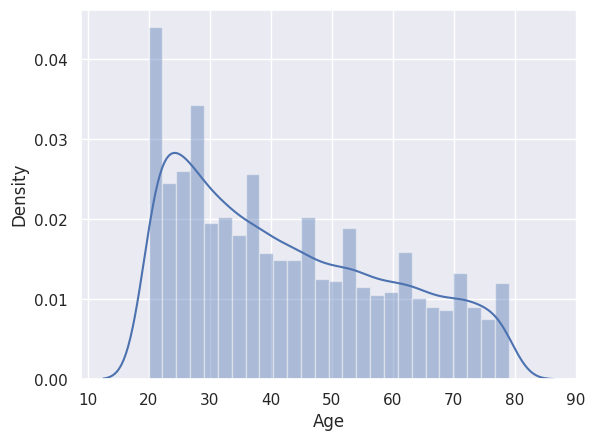

In [31]:
# finding the distribution of "Age" column
sns.distplot(calories_data['Age'])

<ipython-input-32-fdc2a1fecb6d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

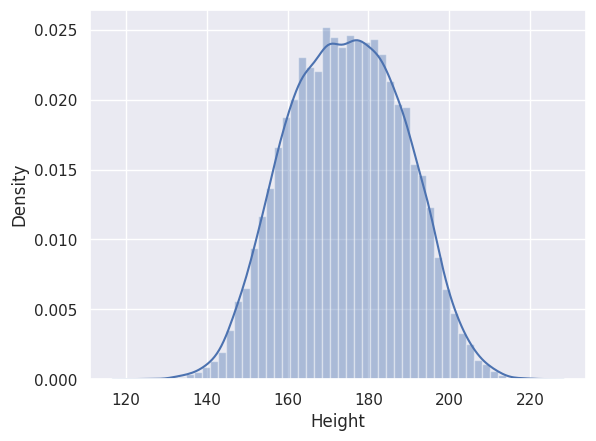

In [32]:
# finding the distribution of "Height" column
sns.distplot(calories_data['Height'])

<ipython-input-33-ac6457c483b4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

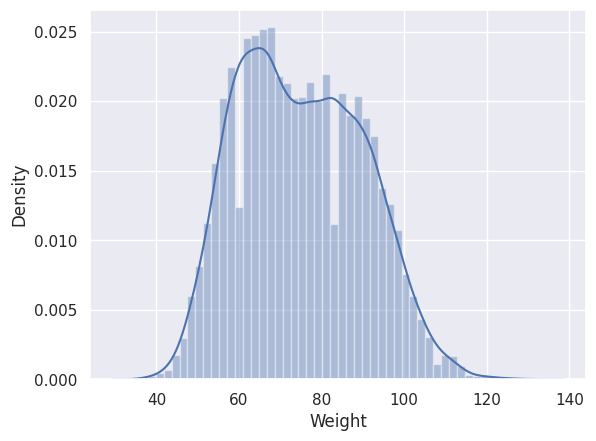

In [33]:
# finding the distribution of "Weight" column
sns.distplot(calories_data['Weight'])

Finding the Correlation in the dataset

1. Positive Correlation
2. Negative Correlation

In [34]:
correlation = calories_data.corr()

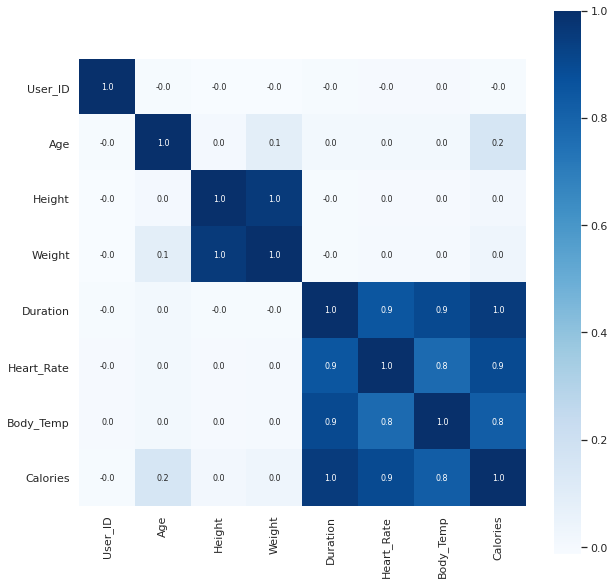

In [ ]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


Converting the text data to numerical values

In [35]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [36]:
X_train, X_, Y_train, Y_ = train_test_split(X, Y, test_size=0.4, random_state=2)

In [37]:
x_cv,x_test,y_cv,y_test=train_test_split(X_,Y_,test_size=0.5,random_state=1)
del X_,Y_

In [38]:
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [39]:
model.fit(x_cv,y_cv)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [40]:
test_data_prediction=model.predict(X_train)
mae = metrics.mean_absolute_error(Y_train, test_data_prediction)
print("error:",mae)

error: 2.183258174818423


In [41]:
test_data_prediction=model.predict(x_cv)
mae = metrics.mean_absolute_error(y_cv, test_data_prediction)
print("error:",mae)

error: 0.5770670369267463


In [42]:
test_data_prediction=model.predict(x_test)
mae = metrics.mean_absolute_error(y_test, test_data_prediction)
print("error:",mae)

error: 2.150187509437402


In [43]:
X = datanew.drop(columns=['User_ID','Calories'], axis=1)
Y = datanew['Calories']
X_train, X_, Y_train, Y_ = train_test_split(X, Y, test_size=0.4, random_state=2)
x_cv,x_test,y_cv,y_test=train_test_split(X_,Y_,test_size=0.5,random_state=1)
del X_,Y_
model = XGBRegressor()
model.fit(X_train, Y_train)
model.fit(x_cv,y_cv)
test_data_prediction=model.predict(X_train)
mae = metrics.mean_absolute_error(Y_train, test_data_prediction)
print("error:",mae)
test_data_prediction=model.predict(x_cv)
mae = metrics.mean_absolute_error(y_cv, test_data_prediction)
print("error:",mae)
import time
start_time=time.time()
test_data_prediction=model.predict(x_test)
end_time=time.time()
mae = metrics.mean_absolute_error(y_test, test_data_prediction)
print("error:",mae)
total_time=end_time-start_time
print("runtime:",total_time,"seconds")

error: 0.036225887805320024
error: 0.010131114151846586
error: 0.035718692379617126
runtime: 0.011173248291015625 seconds


In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x=datanew.drop(['User_ID'],axis=1)
pca.fit(x)
principal_components = pca.transform(x)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
print(pca.explained_variance_ratio_)

[0.49783433 0.2914476  0.1395047 ]


<Axes: >

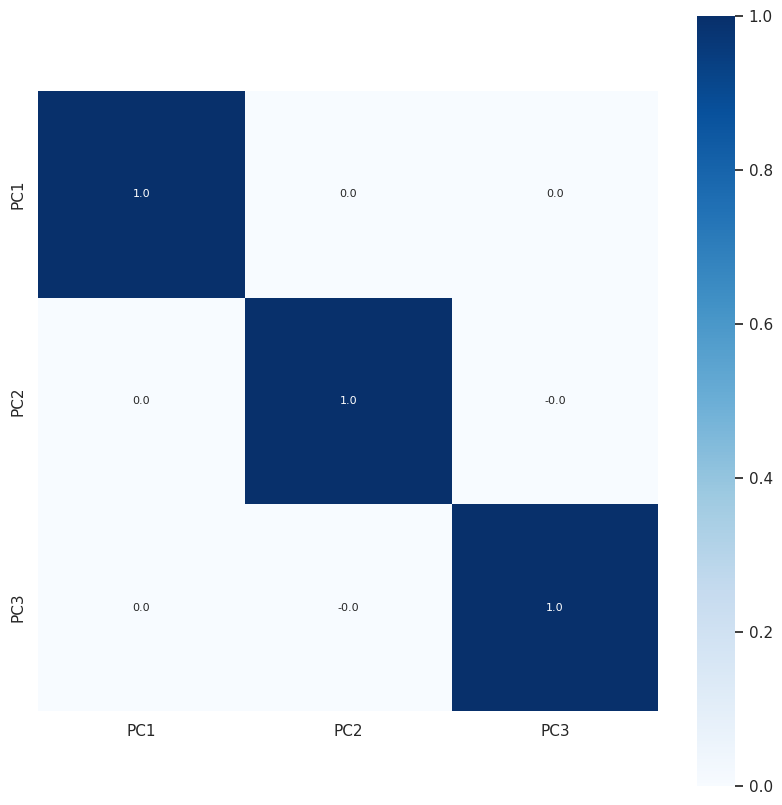

In [46]:
correlation = df_pca.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [47]:
X = df_pca
Y = datanew['Calories']
X_train, X_, Y_train, Y_ = train_test_split(X, Y, test_size=0.4, random_state=2)
x_cv,x_test,y_cv,y_test=train_test_split(X_,Y_,test_size=0.5,random_state=1)
del X_,Y_
model = XGBRegressor()
model.fit(X_train, Y_train)
model.fit(x_cv,y_cv)
test_data_prediction=model.predict(X_train)
mae = metrics.mean_absolute_error(Y_train, test_data_prediction)
print("error:",mae)
test_data_prediction=model.predict(x_cv)
mae = metrics.mean_absolute_error(y_cv, test_data_prediction)
print("error:",mae)
import time
start_time=time.time()
test_data_prediction=model.predict(x_test)
end_time=time.time()
mae = metrics.mean_absolute_error(y_test, test_data_prediction)
print("error:",mae)
total_time=end_time-start_time
print("runtime:",total_time,"seconds")

error: 0.06854474863175111
error: 0.029300156674934495
error: 0.06870327394504754
runtime: 0.0095062255859375 seconds
